In [1]:
#Import basic libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC  
import seaborn as sns

In [2]:
#Import dataset
data2 =pd.read_csv(r"C:\LuLu\Machine Learning\ML ass 2\DataSet\income.csv",names = ['Age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'mstatus',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hoursperweek', 'ncountry', 'income'])

#Take the first 10000 datasamples for this project
data2=data2.iloc[0:10000,:]


print(data2.shape)

#this dataset has 32562 data points and 15 features

#Missing value
data2.dropna(axis=0)




#data2['income']


(10000, 15)


,Age,workclass,fnlwgt,education,educationnum,mstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hoursperweek,ncountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Exploratory data analysis

 <=50K    7621
 >50K     2379
Name: income, dtype: int64


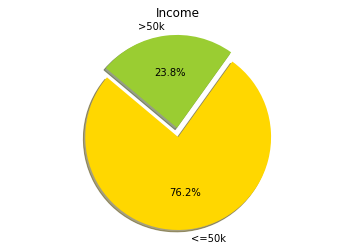

In [3]:
#income pie chart
print(data2['income'].value_counts())

# Data to plot
labels = '<=50k', '>50k'
sizes = [7621, 2379]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.title('Income')
plt.axis('equal')
plt.show()


count    10000.000000
mean        38.452000
std         13.597749
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: Age, dtype: float64


C:\Users\zachm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


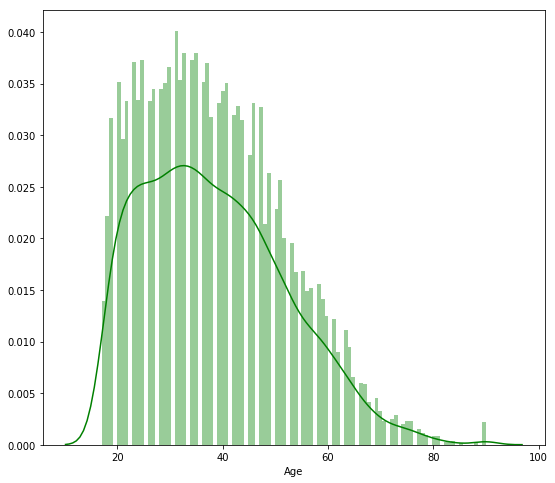

In [4]:
#Age 
print(data2['Age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data2['Age'], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196B653DC88>,
      dtype=object)

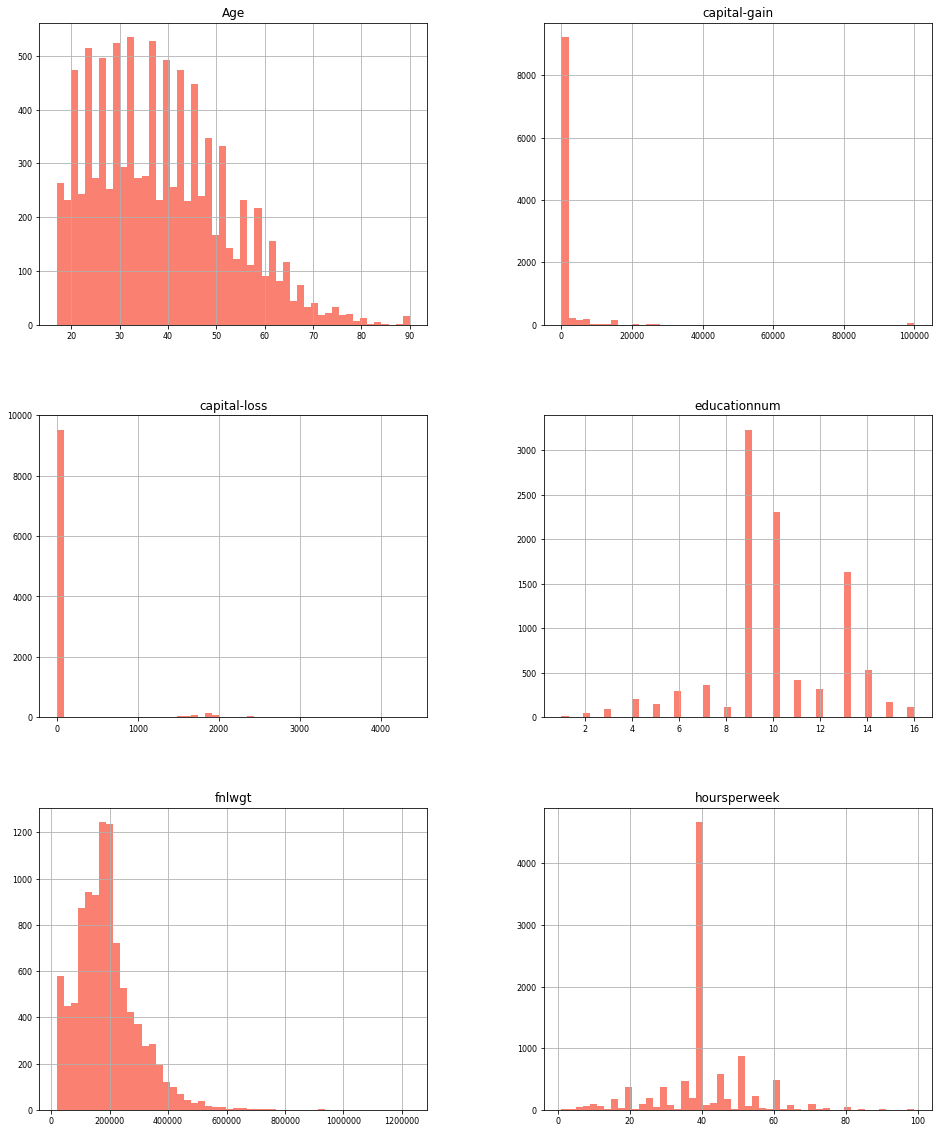

In [5]:
#continous data spread
data2_num = data2.select_dtypes(include = ['float64', 'int64'])
data2_num.head()
data2_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,color='salmon')

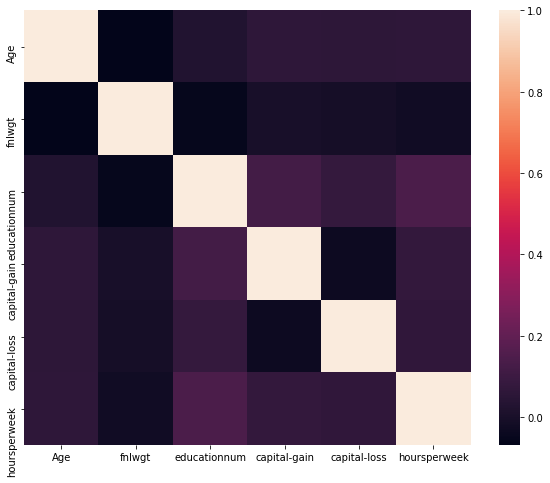

In [6]:
#Relationship among features
f, ax = plt.subplots(figsize=(10, 8))
corr = data2.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Feature Selection

In [7]:
data2=data2[['Age','educationnum','sex','race','hoursperweek','workclass','mstatus','ncountry','occupation','income']]


One Hot Encoding

In [8]:
#turn data into categorical
def categorical(column):
    data2[column]=pd.Categorical(data2[column])
    
#categorical('workclass')
#categorical("education")
categorical("sex")
#categorical("mstatus")
#categorical("occupation")
#categorical("relationship")
categorical("race")
#categorical("ncountry")
categorical("income")

#dummeies
dfDummies = pd.get_dummies(data2['workclass'], prefix = 'workclass')
data2 = pd.concat([data2, dfDummies], axis=1)

dfDummies = pd.get_dummies(data2['sex'], prefix = 'sex')
data2 = pd.concat([data2, dfDummies], axis=1)
    
#dfDummies = pd.get_dummies(data2['education'], prefix = 'education')
#data2 = pd.concat([data2, dfDummies], axis=1)


dfDummies = pd.get_dummies(data2['occupation'], prefix = 'occupation')
data2 = pd.concat([data2, dfDummies], axis=1)
                           
#dfDummies = pd.get_dummies(data2['relationship'], prefix = 'relationship')
#data2 = pd.concat([data2, dfDummies], axis=1)        

dfDummies = pd.get_dummies(data2['race'], prefix = 'race')
data2 = pd.concat([data2, dfDummies], axis=1)

dfDummies = pd.get_dummies(data2['mstatus'], prefix = 'mstatus')
data2 = pd.concat([data2, dfDummies], axis=1)
                           
dfDummies = pd.get_dummies(data2['ncountry'], prefix ='ncountry')
data2 = pd.concat([data2, dfDummies], axis=1)

#dfDummies = pd.get_dummies(data2['income'], prefix = 'income')
#data2 = pd.concat([data2, dfDummies], axis=1)

data2.shape




(10000, 89)

Split data into train and test, x and y

In [9]:
#Extract features
y2=data2[["income"]]      
x2=data2.drop("income",axis=1)
#x2=x2.drop("fnlwgt",axis=1)


#Split into train and test
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)


#
x_train2 = x_train2.drop(['sex','race','workclass','mstatus','ncountry','occupation'], axis=1)
x_test2 = x_test2.drop(['sex','race','workclass','mstatus','ncountry','occupation'], axis=1)

x_train2=np.asarray(x_train2)
x_test2=np.asarray(x_test2)


y_train2=np.asarray(y_train2)
y_test2=np.asarray(y_test2)

y_train2.shape
y_test2.shape




(2000, 1)

In [10]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.fit_transform(x_test2)

C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Generate x and y

In [11]:

def cal_accuracy(y_test,y_pred):
    print("Confusion Matrix:",
         confusion_matrix(y_test,y_pred))
    
    print("Accuracy :",
            accuracy_score(y_test,y_pred)*100)
    print("Error rate:",
             1-(accuracy_score(y_test,y_pred)))
    
    print("Report:",
          classification_report(y_test,y_pred))
    
    return 1-(accuracy_score(y_test,y_pred))

SVM

Linear Kernel

In [12]:
#Import svm library from scikit learn
from sklearn.svm import SVC  

#Linear kernel
svclassifier_d2_1 = SVC(C=0.5,kernel='linear')  
#fit method of SVC class is used to train the algorithm on the training data, whcih is passed as a parameter
svclassifier_d2_1.fit(x_train2, y_train2)  

#Prediction
y2pred1_train=svclassifier_d2_1.predict(x_train2)
y2pred1=svclassifier_d2_1.predict(x_test2)

#Confusion matrix to evaluate the algorithm
#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test2,y2pred1))  
#print(classification_report(y_test2,y2pred1))  

#train error
y2pred1_train_e=cal_accuracy(y_train2,y2pred1_train)
#test error
y2pred1_e=cal_accuracy(y_test2,y2pred1)


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: [[5555  546]
 [ 848 1051]]
Accuracy : 82.575
Error rate: 0.17425000000000002
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6101
        >50K       0.66      0.55      0.60      1899

   micro avg       0.83      0.83      0.83      8000
   macro avg       0.76      0.73      0.74      8000
weighted avg       0.82      0.83      0.82      8000

Confusion Matrix: [[1398  122]
 [ 223  257]]
Accuracy : 82.75
Error rate: 0.1725
Report:               precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      1520
        >50K       0.68      0.54      0.60       480

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.82      0.83      0.82      2000



Polynomial Kernel

In [13]:
svclassifier_d2_2 = SVC(C=0.3,kernel='poly', degree=3)  
svclassifier_d2_2.fit(x_train2, y_train2)

#Prediction on train
y2pred2_train = svclassifier_d2_2.predict(x_train2)

#prediction on test
y2pred2 = svclassifier_d2_2.predict(x_test2)

##Confusion matrix to evaluate the algorithm
#print(confusion_matrix(y_test2,y2pred2))  
#print(classification_report(y_test2,y2pred2))  

#train error
y2pred2_train_e=cal_accuracy(y_train2,y2pred2_train)
#test error
y2pred2_e=cal_accuracy(y_test2,y2pred2)


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix: [[6101    0]
 [1899    0]]
Accuracy : 76.2625
Error rate: 0.237375


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Report:               precision    recall  f1-score   support

       <=50K       0.76      1.00      0.87      6101
        >50K       0.00      0.00      0.00      1899

   micro avg       0.76      0.76      0.76      8000
   macro avg       0.38      0.50      0.43      8000
weighted avg       0.58      0.76      0.66      8000

Confusion Matrix: [[1520    0]
 [ 480    0]]
Accuracy : 76.0
Error rate: 0.24
Report:               precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      1520
        >50K       0.00      0.00      0.00       480

   micro avg       0.76      0.76      0.76      2000
   macro avg       0.38      0.50      0.43      2000
weighted avg       0.58      0.76      0.66      2000



C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Gaussian Kernel

In [14]:
svclassifier_d2_3 = SVC(C=0.3,kernel='rbf')  
svclassifier_d2_3.fit(x_train2, y_train2)  

#Prediction on train
y2pred3_train = svclassifier_d2_3.predict(x_train2)
#prediction on test
y2pred3 = svclassifier_d2_3.predict(x_test2)

##Confusion matrix to evaluate the algorithm
print(confusion_matrix(y_test2,y2pred3))  
print(classification_report(y_test2,y2pred3))  

#train error
y2pred3_train_e=cal_accuracy(y_train2,y2pred3_train)
#test error
y2pred3_e=cal_accuracy(y_test2,y2pred3)

C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1446   74]
 [ 289  191]]
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      1520
        >50K       0.72      0.40      0.51       480

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.81      0.82      0.80      2000

Confusion Matrix: [[5816  285]
 [1176  723]]
Accuracy : 81.7375
Error rate: 0.18262500000000004
Report:               precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      6101
        >50K       0.72      0.38      0.50      1899

   micro avg       0.82      0.82      0.82      8000
   macro avg       0.77      0.67      0.69      8000
weighted avg       0.80      0.82      0.80      8000

Confusion Matrix: [[1446   74]
 [ 289  191]]
Accuracy : 81.85
Error rate: 0.1815
Report:               precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      1520
        >50K     

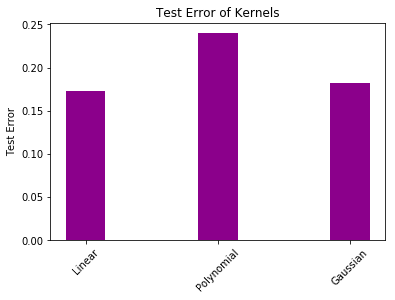

In [63]:
#compare all the kernel

#Bar Chart of Test Error

objects = ('Linear','Polynomial','Gaussian')
y_pos = [0, 2, 4]
performance = [0.1725,0.24,0.1815]

plt.bar(y_pos, performance, width=0.6,alpha=1,color='darkmagenta')
plt.xticks(y_pos, objects,rotation=45)

plt.ylabel('Test Error')
plt.title('Test Error of Kernels')
 
plt.show()





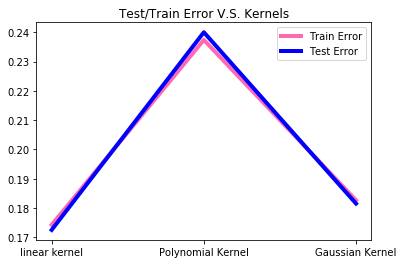

In [64]:
#Kernel learning curve
x=["linear kernel","Polynomial Kernel","Gaussian Kernel"]

Test_Error=[0.1725,0.24,0.1815]
Train_Error=[0.17425000000000002,0.237375,0.18262500000000004]
plt.plot( x, Train_Error, marker='',color='hotpink', linewidth=4,label='Train Error')
plt.plot( x, Test_Error, marker='', color='blue', linewidth=4,label='Test Error')
plt.title('Test/Train Error V.S. Kernels')

plt.legend()



Decision Tree

Default Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier 
d_t_d2=DecisionTreeClassifier(criterion ="gini",random_state=100)
    
#performing training 
d_t_d2.fit(x_train2,y_train2)

#predition on train with giniIndex
y_pred_d_d2_train=d_t_d2.predict(x_train2)
#print("Predicted values:")
#print(y_pred_d_d2_train)

#predition on test with giniIndex
y_pred_d_d2=d_t_d2.predict(x_test2)
#print("Predicted values:")
#print(y_pred_d_d2)
    
#Error rate of train
de=cal_accuracy(y_train2,y_pred_d_d2_train)
#Error rate of test
de1=(cal_accuracy(y_test2,y_pred_d_d2))

#number of total nodes
d_nodes_d2 = d_t_d2.tree_.node_count
print(d_nodes_d2)

Confusion Matrix: [[6088   13]
 [ 114 1785]]
Accuracy : 98.41250000000001
Error rate: 0.015874999999999972
Report:               precision    recall  f1-score   support

       <=50K       0.98      1.00      0.99      6101
        >50K       0.99      0.94      0.97      1899

   micro avg       0.98      0.98      0.98      8000
   macro avg       0.99      0.97      0.98      8000
weighted avg       0.98      0.98      0.98      8000

Confusion Matrix: [[1327  193]
 [ 238  242]]
Accuracy : 78.45
Error rate: 0.21550000000000002
Report:               precision    recall  f1-score   support

       <=50K       0.85      0.87      0.86      1520
        >50K       0.56      0.50      0.53       480

   micro avg       0.78      0.78      0.78      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.78      0.78      0.78      2000

3447


Tree fit function with pruning experiments

In [16]:
#import library
from sklearn.tree import DecisionTreeClassifier 

#I am to use giniIndex as my matric to split the tree


def train_using_gini_d2(x_train,x_test,y_train,max_depth):
    #creating the classifier object
    clf_gini=DecisionTreeClassifier(criterion ="gini",random_state=100,max_depth=max_depth)
    
    #performing training 
    clf_gini.fit(x_train,y_train)
    
    #predition on test with giniIndex
    y_pred=clf_gini.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    
    #number of total nodes
    n_nodes = clf_gini.tree_.node_count
    print("Number of Nodes:")
    print(n_nodes)
    
    return clf_gini,y_pred,n_nodes

Experiment With Pruning

In [17]:
#train
#pruning with max_depth 3
gini1_2_train,treep1_2_train,n1=train_using_gini_d2(x_train2,x_train2,y_train2,3)

#pruning with max_depth 5
gini2_2_train,treep2_2_train,n2=train_using_gini_d2(x_train2,x_train2,y_train2,5)

#pruning with max_depth 10
gini3_2_train,treep3_2_train,n2=train_using_gini_d2(x_train2,x_train2,y_train2,10)

gini4_2_train,treep4_2_train,n4=train_using_gini_d2(x_train2,x_train2,y_train2,15)

gini5_2_train,treep5_2_train,n5=train_using_gini_d2(x_train2,x_train2,y_train2,20)

#test
#pruning with max_depth 3
gini1_2,treep1_2,n6=train_using_gini_d2(x_train2,x_test2,y_train2,3)

#pruning with max_depth 5
gini2_2,treep2_2,n7=train_using_gini_d2(x_train2,x_test2,y_train2,5)

#pruning with max_depth 10
gini3_2,treep3_2,n8=train_using_gini_d2(x_train2,x_test2,y_train2,10)

gini4_2,treep4_2,n9=train_using_gini_d2(x_train2,x_test2,y_train2,15)

gini5_2,treep5_2,n10=train_using_gini_d2(x_train2,x_test2,y_train2,20)

Predicted values:
[' <=50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Number of Nodes:
15
Predicted values:
[' <=50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Number of Nodes:
63
Predicted values:
[' <=50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Number of Nodes:
609
Predicted values:
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Number of Nodes:
1585
Predicted values:
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Number of Nodes:
2321
Predicted values:
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']
Number of Nodes:
15
Predicted values:
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']
Number of Nodes:
63
Predicted values:
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']
Number of Nodes:
609
Predicted values:
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']
Number of Nodes:
1585
Predicted values:
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']
Number of Nodes:
2321


In [31]:
#train
a=cal_accuracy(y_train2,treep1_2_train)

b=cal_accuracy(y_train2,treep2_2_train)

c=cal_accuracy(y_train2,treep3_2_train)

d=cal_accuracy(y_train2,treep4_2_train)

e=cal_accuracy(y_train2,treep5_2_train)

#test
a1=cal_accuracy(y_test2,treep1_2)

b1=cal_accuracy(y_test2,treep2_2)

c1=cal_accuracy(y_test2,treep3_2)

d1=cal_accuracy(y_test2,treep4_2)

e1=cal_accuracy(y_test2,treep5_2)

Confusion Matrix: [[5778  323]
 [1102  797]]
Accuracy : 82.1875
Error rate: 0.17812499999999998
Report:               precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      6101
        >50K       0.71      0.42      0.53      1899

   micro avg       0.82      0.82      0.82      8000
   macro avg       0.78      0.68      0.71      8000
weighted avg       0.81      0.82      0.80      8000

Confusion Matrix: [[5822  279]
 [1083  816]]
Accuracy : 82.975
Error rate: 0.17025
Report:               precision    recall  f1-score   support

       <=50K       0.84      0.95      0.90      6101
        >50K       0.75      0.43      0.55      1899

   micro avg       0.83      0.83      0.83      8000
   macro avg       0.79      0.69      0.72      8000
weighted avg       0.82      0.83      0.81      8000

Confusion Matrix: [[5815  286]
 [ 764 1135]]
Accuracy : 86.875
Error rate: 0.13124999999999998
Report:               precision    recall  f1-score   su

Plot (learning curves)

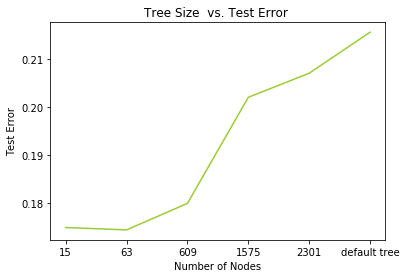

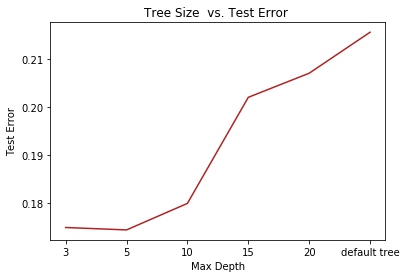

In [37]:
#Plot the result of error as a function of tree size
plt.title("Tree Size  vs. Test Error ")
plt.xlabel("Number of Nodes")
plt.ylabel("Test Error")
#x axis values
x_tree1_plot=[15,63,609,1575,2301,"default tree"]

#y axis value
y_tree1_plot=[a1,b1, c1,d1,e1,de1]

plt.plot(x_tree1_plot,y_tree1_plot,color='yellowgreen')

plt.show()



#Plot the result of error as a function of tree size
plt.title("Tree Size  vs. Test Error ")
plt.xlabel("Max Depth")
plt.ylabel("Test Error")
#x axis values
x_tree1_plot=[3,5,10,15,20,"default tree"]

#y axis value
y_tree1_plot=[a1,b1, c1,d1,e1,de1]

plt.plot(x_tree1_plot,y_tree1_plot,color='firebrick')

plt.show()

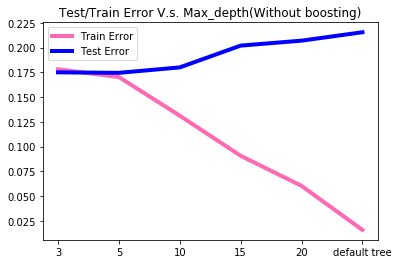

In [38]:


x=[3,5,10,15,20,"default tree"]
Test_Error=[a1,b1, c1,d1,e1,de1]
Train_Error=[a,b, c,d,e,de]

plt.plot( x, Train_Error, marker='',color='hotpink', linewidth=4,label='Train Error')
plt.plot( x, Test_Error, marker='', color='blue', linewidth=4,label='Test Error')
plt.title('Test/Train Error V.s. Max_depth(Without boosting)')

plt.legend()


Boosting

D2 Boosting Function

In [21]:
#Import library
from sklearn.ensemble import AdaBoostClassifier

def btree_d2(xtrain,ytrain,xtest,max_depth):
    
    Btree=AdaBoostClassifier(DecisionTreeClassifier(criterion ="gini",random_state=100,max_depth=max_depth))

    #fit 
    model = Btree.fit(xtrain, ytrain)
    
    #prediction on train
    Btreep_train= model.predict(xtrain)
    print("Predicted values for depth:", max_depth)
    print(Btreep_train)
    
    
    #Prediction on test
    Btreep= model.predict(xtest)
    print("Predicted values for depth:", max_depth)
    print(Btreep)

    
    return Btreep

In [22]:
#train
btreep1_d2_train=btree_d2(x_train2,y_train2,x_train2,3)

#Boosted tree with max depth=5
btreep2_d2_train=btree_d2(x_train2,y_train2,x_train2,5)

#Boosted tree with max depth=10
btreep3_d2_train=btree_d2(x_train2,y_train2,x_train2,10)

#Boosted tree with max depth=15
btreep4_d2_train=btree_d2(x_train2,y_train2,x_train2,15)

#Boosted tree with max depth=20
btreep5_d2_train=btree_d2(x_train2,y_train2,x_train2,20)         


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 3
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 3
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 5
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 5
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 10
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 10
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 15
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 15
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 20
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 20
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']


In [54]:
#train error
#boosted with max depth 3
ba=cal_accuracy(y_train2,btreep1_d2_train)

#boosted with max depth 5
bb=cal_accuracy(y_train2,btreep2_d2_train)

#boosted with max depth 10
bc=cal_accuracy(y_train2,btreep3_d2_train)

#boosted with max depth 15
bd=cal_accuracy(y_train2,btreep4_d2_train)

#boosted with max depth 20
be=cal_accuracy(y_train2,btreep5_d2_train)

Confusion Matrix: [[5635  466]
 [ 648 1251]]
Accuracy : 86.075
Error rate: 0.13924999999999998
Report:               precision    recall  f1-score   support

       <=50K       0.90      0.92      0.91      6101
        >50K       0.73      0.66      0.69      1899

   micro avg       0.86      0.86      0.86      8000
   macro avg       0.81      0.79      0.80      8000
weighted avg       0.86      0.86      0.86      8000

Confusion Matrix: [[5777  324]
 [ 419 1480]]
Accuracy : 90.71249999999999
Error rate: 0.09287500000000004
Report:               precision    recall  f1-score   support

       <=50K       0.93      0.95      0.94      6101
        >50K       0.82      0.78      0.80      1899

   micro avg       0.91      0.91      0.91      8000
   macro avg       0.88      0.86      0.87      8000
weighted avg       0.91      0.91      0.91      8000

Confusion Matrix: [[6028   73]
 [  54 1845]]
Accuracy : 98.41250000000001
Error rate: 0.015874999999999972
Report:               

In [48]:
#test
#Boosted tree with max depth=3

btreep1_d2=btree_d2(x_train2,y_train2,x_test2,3)

#Boosted tree with max depth=5
btreep2_d2=btree_d2(x_train2,y_train2,x_test2,5)

#Boosted tree with max depth=10
btreep3_d2=btree_d2(x_train2,y_train2,x_test2,10)

#Boosted tree with max depth=15
btreep4_d2=btree_d2(x_train2,y_train2,x_test2,15)

#Boosted tree with max depth=20
btreep5_d2=btree_d2(x_train2,y_train2,x_test2,20)                       
                                
                                

C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 3
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 3
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 5
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 5
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 10
[' >50K' ' >50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 10
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 15
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 15
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


C:\Users\zachm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values for depth: 20
[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']
Predicted values for depth: 20
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [49]:

#test error
#boosted with max depth 3
ba1=cal_accuracy(y_test2,btreep1_d2)

#boosted with max depth 5
bb1=cal_accuracy(y_test2,btreep2_d2)

#boosted with max depth 3
bc1=cal_accuracy(y_test2,btreep3_d2)

#boosted with max depth 3
bd1=cal_accuracy(y_test2,btreep4_d2)

#boosted with max depth 3
be1=cal_accuracy(y_test2,btreep5_d2)

Confusion Matrix: [[1396  124]
 [ 214  266]]
Accuracy : 83.1
Error rate: 0.16900000000000004
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      1520
        >50K       0.68      0.55      0.61       480

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.82      0.83      0.82      2000

Confusion Matrix: [[1362  158]
 [ 213  267]]
Accuracy : 81.45
Error rate: 0.1855
Report:               precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      1520
        >50K       0.63      0.56      0.59       480

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.81      0.81      0.81      2000

Confusion Matrix: [[1325  195]
 [ 232  248]]
Accuracy : 78.64999999999999
Error rate: 0.21350000000000002
Report:               precision    recall  f1-scor

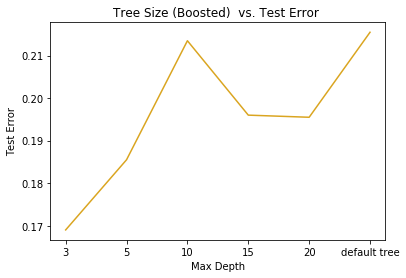

In [50]:
#Plot the result of error as a function of max depth
plt.title("Tree Size (Boosted)  vs. Test Error ")
plt.xlabel("Max Depth")
plt.ylabel("Test Error")
#x axis values
x_tree1_plot=[3,5,10,15,20,"default tree"]

#y axis value
y_tree1_plot=[ba1,bb1,bc1,bd1,be1,de1]

plt.plot(x_tree1_plot,y_tree1_plot,color='goldenrod')

plt.show()


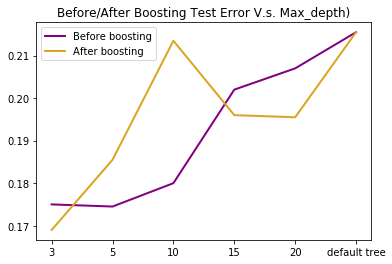

In [51]:
# test error boosting  v.s. not boosted
x=[3,5,10,15,20,"default tree"]
nob=[a1,b1, c1,d1,e1,de1]
b=[ba1,bb1,bc1,bd1,be1,de1]


plt.plot( x, nob, marker='',color='purple', linewidth=2,label='Before boosting')
plt.plot( x, b, marker='', color='goldenrod', linewidth=2,label='After boosting')
plt.title('Before/After Boosting Test Error V.s. Max_depth)')

plt.legend()

Experiment

Plots

Comparison of error rate across all algorithms

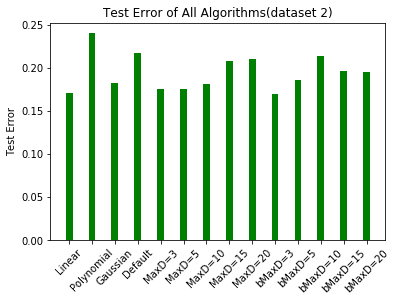

In [60]:
import matplotlib.pyplot as plt  
#Bar Chart of Test Error

objects = ('Linear','Polynomial','Gaussian','Default', 'MaxD=3', 'MaxD=5',"MaxD=10","MaxD=15","MaxD=20",'bMaxD=3', 'bMaxD=5',"bMaxD=10","bMaxD=15","bMaxD=20")
y_pos = [0, 2, 4, 6, 8,10,12,14,16,18,20,22,24,26]
performance = [0.17100000000000004,0.24,0.18200000000000005,0.21699999999999997,0.17500000000000004,0.17500000000000004, 0.1815,0.20750000000000002,0.20999999999999996,ba1,bb1,bc1,bd1,be1]

plt.bar(y_pos, performance, width=0.6,alpha=1,color='g')
plt.xticks(y_pos, objects,rotation=45)

plt.ylabel('Test Error')
plt.title('Test Error of All Algorithms(dataset 2)')
 
plt.show()


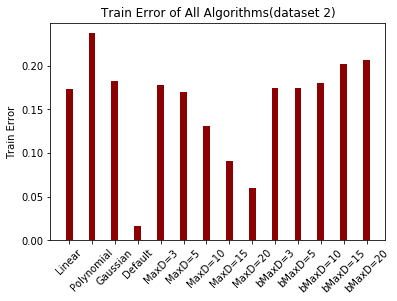

In [59]:
objects = ('Linear','Polynomial','Gaussian','Default', 'MaxD=3', 'MaxD=5',"MaxD=10","MaxD=15","MaxD=20",'bMaxD=3', 'bMaxD=5',"bMaxD=10","bMaxD=15","bMaxD=20")
y_pos = [0, 2, 4, 6, 8,10,12,14,16,18,20,22,24,26]
performance = [0.17337499999999995,0.237375,0.18237499999999995,0.015874999999999972,0.17812499999999998,0.17025, 0.13137500000000002,0.09112500000000001,0.060250000000000026,a1,b1,c1,d1,e1]

plt.bar(y_pos, performance, width=0.6,alpha=1,color='darkred')
plt.xticks(y_pos, objects,rotation=45)

plt.ylabel('Train Error')
plt.title('Train Error of All Algorithms(dataset 2)')
 
plt.show()

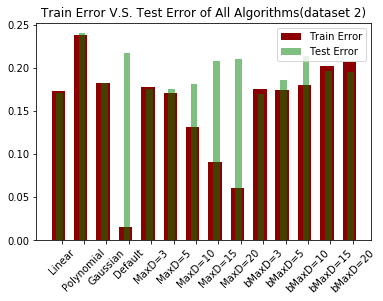

In [61]:
width = 0.6

testerror   = [0.17100000000000004,0.24,0.18200000000000005,0.21699999999999997,0.17500000000000004,0.17500000000000004, 0.1815,0.20750000000000002,0.20999999999999996,ba1,bb1,bc1,bd1,be1]
trainerror    = [0.17337499999999995,0.237375,0.18237499999999995,0.015874999999999972,0.17812499999999998,0.17025, 0.13137500000000002,0.09112500000000001,0.060250000000000026,a1,b1,c1,d1,e1]

indices = np.arange(len(trainerror))

plt.bar(indices, trainerror, width=width, 
        color='darkred', label='Train Error')
plt.bar([i+0.1*width for i in indices], testerror, 
        width=0.5*width, color='g', alpha=0.5, label='Test Error')

objects = ('Linear','Polynomial','Gaussian','Default', 'MaxD=3', 'MaxD=5',"MaxD=10","MaxD=15","MaxD=20",'bMaxD=3', 'bMaxD=5',"bMaxD=10","bMaxD=15","bMaxD=20")
plt.xticks(indices+width/4, 
           objects,rotation=45 )

plt.title('Train Error V.S. Test Error of All Algorithms(dataset 2)')

plt.legend()

plt.show()